E-WASTE ECONOMIC MODEL RESULTS
Total Net Benefit (2025–2035): ₹3465.00 Cr
Total Capital Investment: ₹500.00 Cr
ROI: 593.0%
Payback Year: 2027
Jobs Created (2035): 500



,Year,E_Waste_Tons,Total_Cost (₹Cr),Total_Benefit (₹Cr),Net_Benefit (₹Cr),Jobs_Created
0,2025,100000.0,200.0,400.0,210.0,250.0
1,2026,110000.0,220.0,440.0,231.0,275.0
2,2027,120000.0,240.0,480.0,252.0,300.0
3,2028,130000.0,260.0,520.0,273.0,325.0
4,2029,140000.0,280.0,560.0,294.0,350.0
5,2030,150000.0,300.0,600.0,315.0,375.0
6,2031,160000.0,320.0,640.0,336.0,400.0
7,2032,170000.0,340.0,680.0,357.0,425.0
8,2033,180000.0,360.0,720.0,378.0,450.0
9,2034,190000.0,380.0,760.0,399.0,475.0


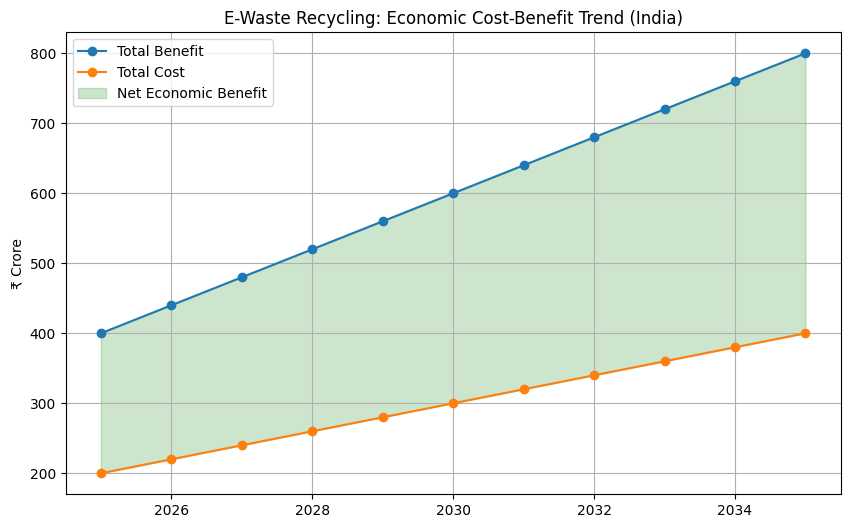

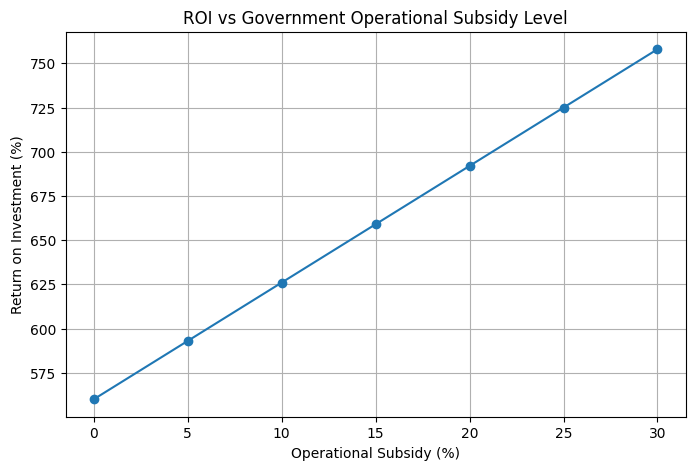

In [1]:

# E-WASTE ECONOMIC IMPACT MODEL
# Cost-Benefit + Government Incentive Simulation (India Context)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1. PARAMETERS —


years = np.arange(2025, 2036)

# E-waste generation (tonnes/year)
e_waste = np.linspace(100000, 200000, len(years))  # projected increase

# Economic parameters (in ₹ crore)
collection_cost_per_ton = 8_000        # collection + logistics
recycling_cost_per_ton = 12_000        # formal recycling cost
resource_recovery_value_per_ton = 25_000  # average recovered material value
health_cost_per_ton_informal = 15_000  # health + environmental damage avoided if formalized

# Employment and social impact
jobs_per_1000_tons = 2.5  # new jobs created in formal recycling per 1,000 tons

# Government incentive (as per 2025 Critical Mineral Recycling Scheme)
capital_subsidy = 0.15  # 15% subsidy on setup cost
operational_incentive = 0.05  # 5% subsidy on annual OPEX

# Initial investment for setting up recycling infrastructure
capital_investment = 500  # ₹ crore

# ---------------------------------------------------------------
# 2. CALCULATE ECONOMIC INDICATORS
# ---------------------------------------------------------------

results = []

for i, year in enumerate(years):
    waste = e_waste[i]

    total_cost = (collection_cost_per_ton + recycling_cost_per_ton) * waste / 1e7  # ₹ crore
    total_benefit = (resource_recovery_value_per_ton + health_cost_per_ton_informal) * waste / 1e7  # ₹ crore

    # Apply incentives (reduce cost)
    effective_cost = total_cost * (1 - operational_incentive)
    net_benefit = total_benefit - effective_cost

    jobs = (waste / 1000) * jobs_per_1000_tons

    results.append({
        "Year": year,
        "E_Waste_Tons": waste,
        "Total_Cost (₹Cr)": total_cost,
        "Total_Benefit (₹Cr)": total_benefit,
        "Net_Benefit (₹Cr)": net_benefit,
        "Jobs_Created": jobs
    })

df = pd.DataFrame(results)

# ---------------------------------------------------------------
# 3. PAYBACK PERIOD & ROI
# ---------------------------------------------------------------

total_net_benefit = df["Net_Benefit (₹Cr)"].sum()
roi = (total_net_benefit - capital_investment) / capital_investment * 100

cumulative_benefit = df["Net_Benefit (₹Cr)"].cumsum()
payback_year = df["Year"].iloc[np.argmax(cumulative_benefit > capital_investment)]

print("============================================")
print("E-WASTE ECONOMIC MODEL RESULTS")
print("============================================")
print(f"Total Net Benefit (2025–2035): ₹{total_net_benefit:.2f} Cr")
print(f"Total Capital Investment: ₹{capital_investment:.2f} Cr")
print(f"ROI: {roi:.1f}%")
print(f"Payback Year: {payback_year}")
print(f"Jobs Created (2035): {df['Jobs_Created'].iloc[-1]:,.0f}")
print("============================================\n")

display(df)

# ---------------------------------------------------------------
# 4. VISUALIZATION
# ---------------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(df["Year"], df["Total_Benefit (₹Cr)"], label="Total Benefit", marker='o')
plt.plot(df["Year"], df["Total_Cost (₹Cr)"], label="Total Cost", marker='o')
plt.fill_between(df["Year"], df["Total_Cost (₹Cr)"], df["Total_Benefit (₹Cr)"],
                 color='green', alpha=0.2, label='Net Economic Benefit')
plt.title("E-Waste Recycling: Economic Cost-Benefit Trend (India)")
plt.ylabel("₹ Crore")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 5. SENSITIVITY: Impact of Subsidy Rate
# ---------------------------------------------------------------

subsidy_range = np.arange(0, 0.31, 0.05)
roi_list = []

for sub in subsidy_range:
    effective_costs = df["Total_Cost (₹Cr)"] * (1 - sub)
    roi_list.append(((df["Total_Benefit (₹Cr)"].sum() - effective_costs.sum()) - capital_investment)
                    / capital_investment * 100)

plt.figure(figsize=(8,5))
plt.plot(subsidy_range*100, roi_list, marker='o')
plt.title("ROI vs Government Operational Subsidy Level")
plt.xlabel("Operational Subsidy (%)")
plt.ylabel("Return on Investment (%)")
plt.grid(True)
plt.show()
